# Predicting Customer Churn for SyriaTel

## Overview

The goal is to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem with 2 possible outcomes:
- The customer will soon stop doing business with SyriaTel.
- The customer will not stop doing business with SyriaTel.

# 1.Business Understanding

The loss of customers in a company such as SyriaTel means loss of revenue and increased costs since acquiring new customers is more expensive than retaining existing ones. Predicting customer dropout in advance helps SyriaTel identify high-risk customers early therefore implementing cost-effective retention strategies leading to reduced revenue loss and improved customer satisfaction which leads to profitability to the telecommunication company.

### Key Business Questions
- What are some of the factors that contribute to customer dropout?
- How can SyriaTel leverage on these factors to come up with solutions?

# 2.Data Understanding

This dataset was sourced from (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) with key features such as:
- Account length
- Area code
- Phone number
- Total day calls
- Total intl calls
- Customer service calls
- Number vmail messages
- International plan
- Total night minutes

## a)Load the Dataset

In [22]:
#Your code here
import pandas as pd
file_path = r"C:\Users\ADMIN\Downloads\archive (1)\bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
#DataFrame Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# 3.Data Preparation

## Check for missing values

In [24]:
#Your code here
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## Define X and y

In [25]:
#Your code here
X = df.drop('churn', axis=1)
y = df['churn']

## Train-Test Split

In [26]:
#Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Convert categorical variables and the target variable using get_dummies()

In [27]:
#Your code here
X_train = pd.get_dummies(X_train, columns=['international plan', 'voice mail plan'], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['international plan', 'voice mail plan'], drop_first=True, dtype=int)

In [28]:
#Your code here
y_train = pd.get_dummies(y_train, drop_first=True, dtype=int)
y_test = pd.get_dummies(y_test, drop_first=True, dtype=int)

## Standardize Numerical Features

In [29]:
#Your code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                'area code', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge',
                'customer service calls']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train = X_train.drop(columns=['phone number', 'state'])
X_test = X_test.drop(columns=['phone number', 'state'])

## 4.Modelling and Evaluation

### Build a Baseline Logistic Regression Model

In [30]:
#Your code here
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model = logreg.fit(X_train, y_train.values.ravel())
model

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Performance on Training Data

In [31]:
#Your code here
import numpy as np
y_train = y_train.values.ravel()
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2297
1     369
Name: Residuals (counts), dtype: int64

0    0.86159
1    0.13841
Name: Residuals (proportions), dtype: float64


We can see from the observation above, our model was 86% correct on the training data.

## Performance on Test Data

In [32]:
#Your code here
y_test = y_test.values.ravel()
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    562
1    105
Name: Residuals (counts), dtype: int64

0    0.842579
1    0.157421
Name: Residuals (proportions), dtype: float64


We can say that our classifier was 84% correct on the test data. In this case 0 means a correct prediction while 1 refers to a misclassification.

## Visualize a ROC curve

AUC: 0.7405800650736452


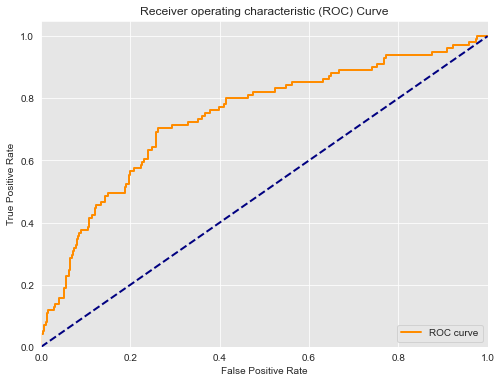

In [33]:
#Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Class Imbalance

Class imbalance occurs when the distribution of classes in a classification dataset is significantly skewed. In the dataset above, one class is seen to be having more instances than the other class.

To fix this, we will use an oversampling technique known as Synthetic Minority Oversampling(SMOTE).

In [34]:
#Your code here
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
print('-----------------------------------------')
print('SMOTE class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

False    2850
True      483
Name: churn, dtype: int64
-----------------------------------------
SMOTE class distribution: 

1    2284
0    2284
dtype: int64


AUC: 0.7741314767519154


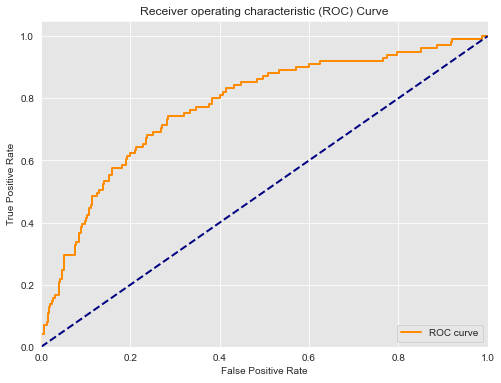

In [35]:
#Your code here
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As compared to the previous model, we see a higher AUC in the model above indicating that SMOTE improved the model's performance on the minority class which in this case is churn.

## Confusion Matrices

This model is trying is predict whether or not a customer will stop doing business with Syria Tel. A confusion matrix gives you the true positive, true negative, false positive and the false negative values.

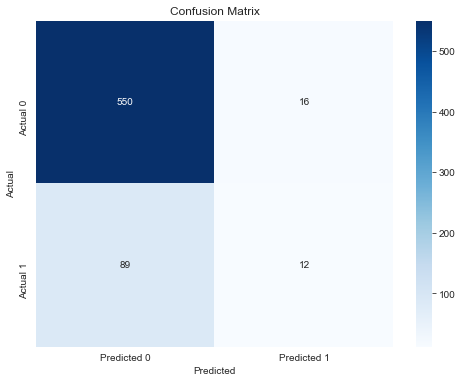

In [36]:
#Your code here
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#Evaluate the Confusion Matrix
Accuracy = (12 + 550) / (12 + 550 + 16 + 89)
Precision = 12 / (12 + 16)
Recall = 12 / (12 + 89)
F1_score = 2 * ((12 / (12 + 16)) * (12 / (12 + 89))) / ((12 / (12 + 16)) + (12 / (12 + 89)))

print(Accuracy)
print(Precision)
print(Recall)
print(F1_score)

0.8425787106446777
0.42857142857142855
0.1188118811881188
0.186046511627907


The model accurately classifies 84% of customer churn.

A low precision of 42.86% means many customers predicted to churn but actually stayed.

A very low recall of 11.88% means that the model missed many actual churners.

A F1-score of about 18.6% indicates poor performance, meaning the model isn’t effective at identifying churn.

## Decision Tree Classifier

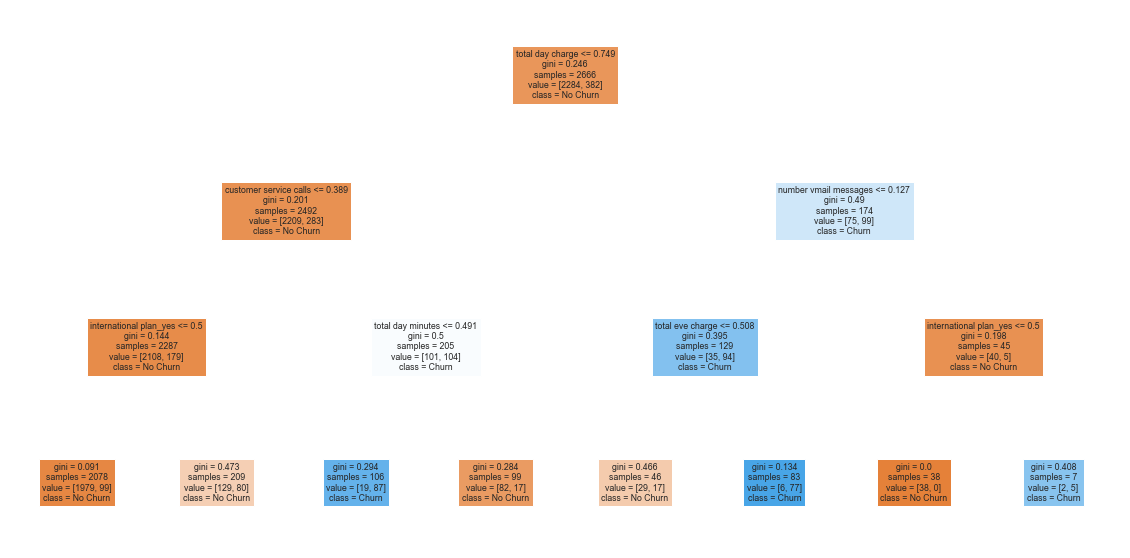

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
plt.show()

## Hyperparameter Tuning in Decision Trees

Hyperparameter tuning involves selecting the best set of hyperparameters for your model to improve its performance. In this case we are going to use Grid Search which is a hyperparameter tuning technique.

In [39]:
#Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dtree = grid_search.best_estimator_
y_pred_tree = best_dtree.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_tree)
best_params = grid_search.best_params_
print("Decision Tree Accuracy: {:.2f}%".format(dt_acc * 100))
print("Best Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 93.55%
Best Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.82      0.73      0.77       101

    accuracy                           0.94       667
   macro avg       0.89      0.85      0.87       667
weighted avg       0.93      0.94      0.93       667



## Churn Distribution By Features

<Figure size 864x576 with 0 Axes>

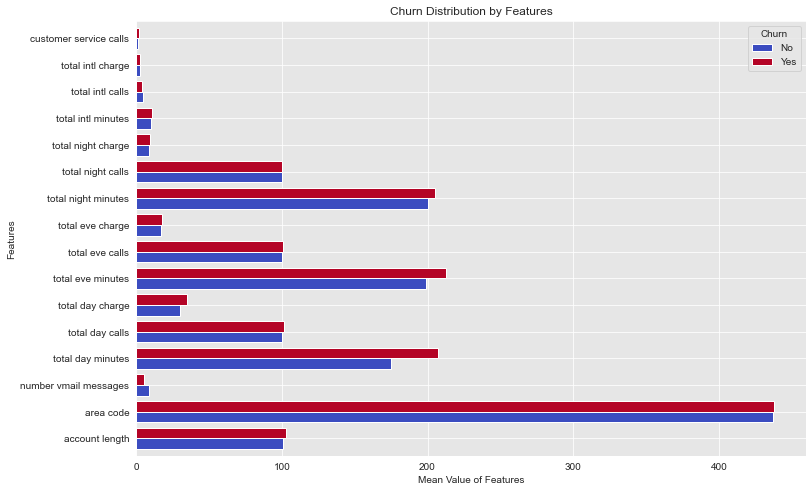

In [40]:
#Your code here
plt.figure(figsize=(12, 8))
churn_distribution = df.groupby('churn').mean()
churn_distribution.T.plot(kind='barh', figsize=(12, 8), width=0.8, colormap='coolwarm')
plt.title("Churn Distribution by Features")
plt.xlabel("Mean Value of Features")
plt.ylabel("Features")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig("churn_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## Conclusion

### Findings

Our analysis developed a churn prediction model for SyriaTel, achieving a high accuracy of 93.55% using a tuned Decision Tree Classifier.

About 95% of customers predicted as non-churners was actually correct while 82% of those predicted as churners was equally correct(Precision).

The model identifies 97% of non-churners and 73% of churners correctly meaning it still misses a percentage of churners(Recall).

The model has a higher f1_score of 96% meaning it identifies non-churners with ease as compared to churners.


### Recommendations

1.Since recall for churners is 73%, the model correctly identifies many customers who are likely to leave. SyriaTel can target these high risk customers by offering discounts or improved customer service.

2.Ensure high-risk customers complaints are resolved in the shortest time possible and this reduces frustations among them.

3.If certain area codes have a significantly higher churn rate, SyriaTel should investigate whether these regions have poorer service quality, limited coverage, or strong competitors.

4.The company can reach out to high-usage customers with special offers which prevents churn.

5.From our findings we can see that the recall for churners is only 73%, meaning that 27% of actual churners are being misclassified as customers who will stay. To resolve this issue, we can train the model on more behavioural data since they change over time thus helping to refine our predictions.

## Summary

Customer churn is a major challenge for SyriaTel impacting revenue and long-term growth. Using machine learning, we built a Decision Tree classifier that achieved 93.55% accuracy, effectively predicting which customers are likely to stop using services provided by SyriaTel. By taking note of these insights, SyriaTel can make steps to reduce churn, increase customer satisfaction and maximize revenue.